# **No Library Used**

In [ ]:
# Trainning data
x = [1,2,3,4,5,1.1,2.2,2.5,3.8,4.8]
y = [1.5,2,2,3.5,5,1.2,1.9,3.5,3.7,5.1]

In [ ]:
# Calculate Linear Regression equations
# y = a1 + b1 * x
# without any libraries

x_power = [n ** 2 for n in x]
xy = [x[i] * y[i] for i in range(len(x))]

# Slope
b1 = (len(x)*sum(xy)-sum(x)*sum(y)) / (len(x)*sum(x_power)-sum(x)**2)
# Intercept
a1 = (sum(y)-b1*sum(x)) / len(x)

print("Linear Regression Formular is:\n", "y = {:.3f} + {:.3f}x".format(a1, b1))


Linear Regression Formular is:
 y = 0.239 + 0.919x


In [ ]:
#Calculate Non-Linear Regression equations
# y = a2 + b2 * x^2
#without any libraries
 
# p = x*x
p = [n * n for n in x]
p_power = [n ** 2 for n in p]
py = [p[i] * y[i] for i in range(len(p))]

# Slope
b2 = (len(p)*sum(py)-sum(p)*sum(y)) / (len(p)*sum(p_power)-sum(p)**2)
# Intercept
a2 = (sum(y)-b2*sum(p)) / len(p)

print("Non-Linear Regression Formular is:\n", "y = {:.3f} + {:.3f}x^2".format(a2, b2))


Non-Linear Regression Formular is:
 y = 1.349 + 0.152x^2


In [ ]:
# Validation data
x1 = [1.5,2.9,3.7,4.7,5.1]
y1 = [1.7,2.7,2.5,2.8,5.5]

In [ ]:
# MSE
# Trainning set
# Linear Regression

y_M1real = [a1+b1*n for n in x]
y_M2real = [a2+b2*n*n for n in x]

sum1 = 0
sum2 = 0

# Model 1 linear regression
for i in range (len(y_M1real)):
  sum1 += (y_M1real[i]-y[i]) ** 2
m1T_MSE = sum1 /len(y_M1real)
print("MSE for trainning set of Model 1 is: {:.4f}".format(m1T_MSE))

# Model 2 Non-linear regression
for i in range (len(y_M2real)):
  sum2 += (y_M2real[i]-y[i]) ** 2
m2T_MSE = sum2 /len(y_M2real)
print("MSE for trainning set of Model 2 is: {:.4f}\n".format(m2T_MSE))


# Validation Set
y1_M1real = [a1+b1*n for n in x1]
y1_M2real = [a2+b2*n*n for n in x1]

sum3 = 0
sum4 = 0

# Model 1 linear regression
for i in range (len(y1_M1real)):
  sum3 += (y1_M1real[i]-y1[i]) ** 2
m1V_MSE = sum3 /len(y1_M1real)
print("MSE for validation set of Model 1 is: {:.4f}".format(m1V_MSE))

# Model 2 Non-linear regression
for i in range (len(y1_M2real)):
  sum4 += (y1_M2real[i]-y1[i]) ** 2
m2V_MSE = sum4 /len(y1_M2real)
print("MSE for validation set of Model 2 is: {:.4f}\n".format(m2V_MSE))

MSE for trainning set of Model 1 is: 0.2579
MSE for trainning set of Model 2 is: 0.2291

MSE for validation set of Model 1 is: 0.9524
MSE for validation set of Model 2 is: 0.9055



In [ ]:
# Compare Model 1 and Model 2
# Model 1
c_m1 = m1V_MSE / m1T_MSE
print("Model 1 score is ", c_m1)
# Model 2
c_m2 = m2V_MSE / m2T_MSE
print("Model 2 score is ", c_m2)

print()
if c_m1 <= c_m2:
  print("Model 1 is better than Model 2")
else:
  print("Model 2 is better than Model 2")


Model 1 score is  3.6930968840818954
Model 2 score is  3.952934769546499

Model 1 is better than Model 2


# **Using sklearn**

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some data
# Tranning data
x = np.array([1,2,3,4,5,1.1,2.2,2.5,3.8,4.8]).reshape(-1, 1)
y = np.array([1.5,2,2,3.5,5,1.2,1.9,3.5,3.7,5.1])

# Validation data
x_v = np.array([1.5,2.9,3.7,4.7,5.1]).reshape((-1,1))
y_v = np.array([1.7,2.7,2.5,2.8,5.5])



In [ ]:
######################### Model 1 ##########################
# Create a numpy array of data:
x = np.array([1,2,3,4,5,1.1,2.2,2.5,3.8,4.8]).reshape((-1, 1))
y = np.array([1.5,2,2,3.5,5,1.2,1.9,3.5,3.7,5.1])

# Create an instance of a linear regression model and fit it to the data with the fit() function:
model1 = LinearRegression().fit(x, y) 

# Intercept:
intercept = model1.intercept_

# Slope:
coef = model1.coef_

print("Model 1:\ny = {:.3f} + {:.3f}*x".format(intercept,coef[0]))

# Make predictions
y_pred = model1.predict(x)
y_pred_v = model1.predict(x_v)

# Calculate the MSE
# Trainning
mseT = mean_squared_error(y, y_pred)
print("Mean Squared Error for trainning set:", mseT)

# Validation
mseV = mean_squared_error(y_v, y_pred_v)
print("Mean Squared Error for validation set:", mseV)

m1_score = mseV / mseT
print("Model 1 score: ", m1_score)
print()


Model 1:
y = 0.239 + 0.919*x
Mean Squared Error for trainning set: 0.25789740514609677
Mean Squared Error for validation set: 0.9524401033578563
Model 1 score:  3.6930968840818963



In [ ]:
####################### Model 2 ############################
# Transform the data into a higher-dimensional space
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_v_poly = poly.fit_transform(x_v)

# Fit a linear regression model to the polynomial features
model2 = LinearRegression()
model2.fit(x_poly, y)

# Print the final equation
coef = model2.coef_
intercept = model2.intercept_
print("Model 2:\ny = {:.3f} + {:.3f}*x + {:.9f}*x^2".format(intercept,coef[1], coef[0]))

# Make predictions
y2_pred = model2.predict(x_poly)
y2_pred_v = model2.predict(x_v_poly)

# Calculate the MSE
# Trainning
mseT2 = mean_squared_error(y, y2_pred)
print("Mean Squared Error for trainning set:", mseT2)

# Validation
mseV2 = mean_squared_error(y_v, y2_pred_v)
print("Mean Squared Error for validation set:", mseV2)

m2_score = mseV2 / mseT2
print("Model 2 score: ", m2_score)
print()


Model 2:
y = 1.059 + 0.231*x + 0.000000000*x^2
Mean Squared Error for trainning set: 0.22553959292776132
Mean Squared Error for validation set: 0.9150979389564325
Model 2 score:  4.057371599715229



In [ ]:
################### Compare #############################
print("\nSelect Model")
if m1_score <= m2_score:
  print("Model 1 is better than Model 2")
else:
  print("Model 2 is better than Model 2")


Select Model
Model 1 is better than Model 2


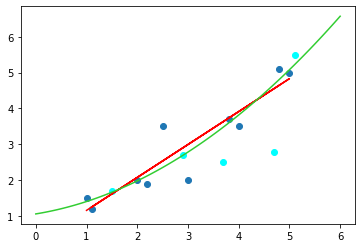

In [ ]:
# Enhancement
# Plot the dots and graph the models
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# plot the data points
plt.scatter(x, y)
plt.scatter(x_v, y_v, color='aqua')

# plot the regression line
plt.plot( x, model1.predict(x), color='red')

x_fit = np.linspace(0, 6, 100)
y_fit = model2.predict(poly.fit_transform(x_fit.reshape(-1, 1)))
plt.plot(x_fit, y_fit, '-r', color='limegreen')

plt.show()
